## 1. Spatiality Blog
<p>Over the last 2 years I have posted on the Spatiality website 40 blog articles categorized under Cloud Computing, Data Science, Digital Transformation, and Geospatial Technology. From January until June 2017 I faithfully posted articles on Cloud Computing, Digital Transformation and Geospatial Technology. After a long break I started blogging again in October 2017 on Data Science and Geospatial Technology. This reflected my evolving interest in Geospatial Data Science and provided a platform for sharing new-found skills and insights.</p>
<p>My second spate of blogging became rather intermittent and I found it more convenient to share my work as screenshots on Twitter. Now in 2019 I look forward to discover the excitement of my early blogging days in sharing my projects and hacks as a Geospatial Data Scientist. To kick this off let us import key statistics of my blog posts from 2017 and 2018.</p>

In [1]:
# Import the Pandas libraries
import pandas as pd
# Read blog statistics into a data frame bs, 
# Use index_col='Date' and parse_dates=True to use Date as a DateTime Index 
bs = pd.read_csv('datasets/Blog_Statistics_Spatiality.csv', index_col='Date', parse_dates=True, dayfirst=True)
# Examine the head of the dataframe
bs.head()

,Blog_id,Title,Category,Gap,Words,Shares
Date,,,,,,
2017-02-27,1,"Domain, Web and E-mail Hosting for Startups",Digital Transformation,0,798,22
2017-03-02,2,What is Cloud Computing?,Cloud Computing,3,711,23
2017-03-06,3,What Office 365 plan is right for my business?,Cloud Computing,4,563,11
2017-03-09,4,What is Special About Spatial?,Geospatial Technology,3,562,15
2017-03-13,5,Benefits and Challenges of Cloud Computing,Cloud Computing,4,684,15


## 2. Examine the data
<p>The head of the dataframe shows key attributes for the different blog posts such as tile, category, etc. Let us examine the data in more detail.</p>

In [2]:
# Use .info() for a concise summary of the data frame
bs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2017-02-27 to 2018-11-01
Data columns (total 6 columns):
Blog_id     40 non-null int64
Title       40 non-null object
Category    40 non-null object
Gap         40 non-null int64
Words       40 non-null int64
Shares      40 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.2+ KB


In [3]:
# Use .describe() for summary statistics on the numeric features
bs.describe()

,Blog_id,Gap,Words,Shares
count,40.000000,40.00000,40.000000,40.000000
mean,20.500000,15.30000,1100.450000,13.175000
std,11.690452,25.85383,486.415827,12.495922
min,1.000000,0.00000,442.000000,0.000000
25%,10.750000,4.00000,753.000000,8.000000
50%,20.500000,7.00000,905.000000,12.000000
75%,30.250000,14.00000,1426.750000,16.000000
max,40.000000,112.00000,2150.000000,79.000000


In [4]:
# Use .value_counts on the Category series to obtain a frequency table
bs.Category.value_counts()

Geospatial Technology     16
Digital Transformation     9
Data Science               8
Cloud Computing            7
Name: Category, dtype: int64

## 2. Visualize the data
<p>A picture is worth a thousand words, so we will use <b>Mathplotlib</b> and <b>Seaborn</b> to visualize our blog data for further insights.</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002048CFA95F8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002048D13BDA0>], dtype=object)

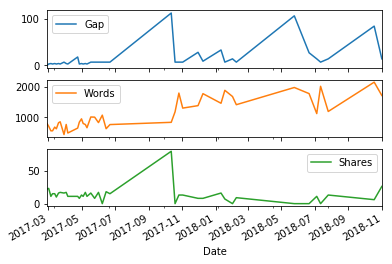

In [5]:
# Import Matplotlib.pyplot library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot line graphs
bs[['Gap', 'Words', 'Shares']].plot(subplots=True)

Text(0.5, 0, 'Post length(no. of words)')

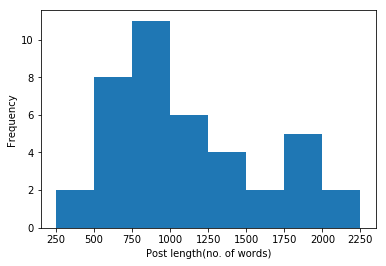

In [6]:
# Plot Histogram of blog length (No. of Words)
bs.plot(y='Words', kind='hist', bins=[250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], legend=False)
plt.xlabel('Post length(no. of words)')

[Text(0, 0, 'Digital Transformation'),
 Text(0, 0, 'Cloud Computing'),
 Text(0, 0, 'Geospatial Technology'),
 Text(0, 0, 'Data Science')]

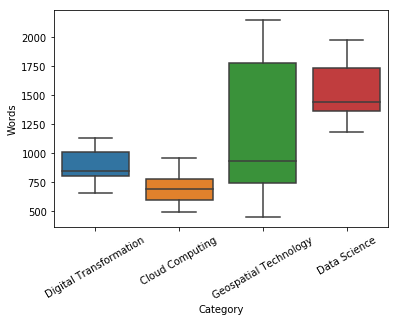

In [7]:
# Import Seborn library
import seaborn as sns
# Plot boxplot of no. of words for each category 
ax = sns.boxplot(x='Category', y='Words', data=bs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

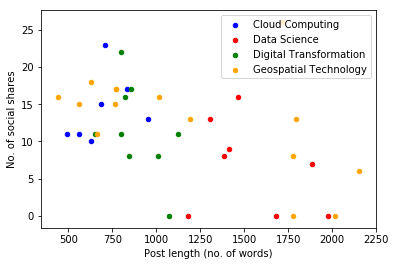

In [8]:
color_cat = {'Digital Transformation':'blue', 'Cloud Computing':'orange', 'Geospatial Technology':'green', 'Data Science':'red'}
bs['Color'] = bs.Category.map(color_cat)
bs_clean = bs[bs['Shares'] != 79]
ax = bs[bs['Category'] == 'Cloud Computing'].plot(kind='scatter', x='Words', y='Shares', c='blue', label='Cloud Computing')
bs[bs['Category'] == 'Data Science'].plot(ax=ax, kind='scatter', x='Words', y='Shares', c='red', label='Data Science')
bs[bs['Category'] == 'Digital Transformation'].plot(ax=ax, kind='scatter', x='Words', y='Shares', c='green', label='Digital Transformation')
bs_clean[bs_clean['Category'] == 'Geospatial Technology'].plot(ax=ax, kind='scatter', x='Words', y='Shares', c='orange', label='Geospatial Technology')
plt.xlabel('Post length (no. of words)')
plt.ylabel('No. of social shares')
plt.legend(loc='upper right')

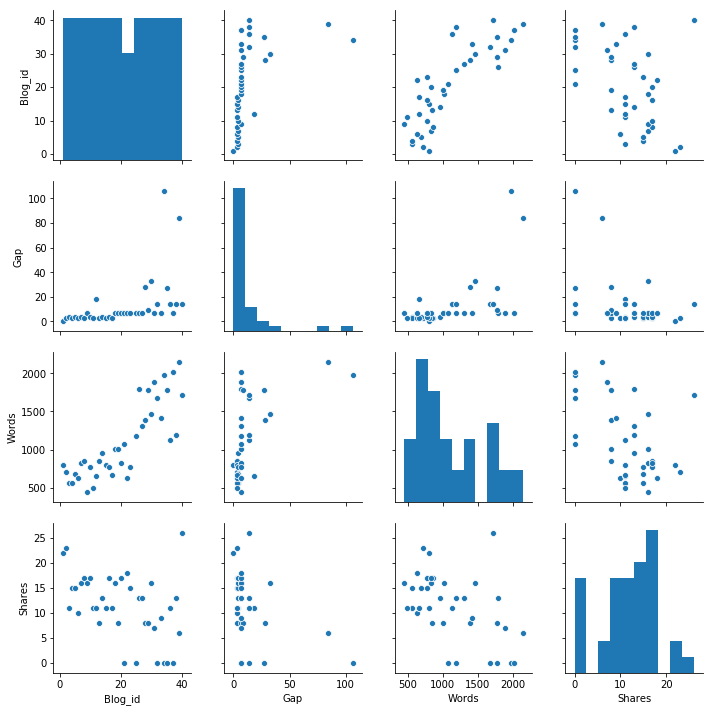

In [9]:
sns.pairplot(bs_clean)

In [10]:
# Import Numpy as np
import numpy as np
# Calculate Pearson correlation coefficient between Blog_id and Words
np.corrcoef(bs['Blog_id'], bs['Words'])

array([[ 1.        ,  0.82708959],
       [ 0.82708959,  1.        ]])